In [1]:
import numpy as np 
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import metrics


In [4]:
def unet(pretrained_weights = None,input_size = (None,None,1)):
    inputs = layers.Input(input_size)

    c1 = layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
    c1 = layers.Dropout(0.1) (c1)
    c1 = layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
#    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = layers.MaxPooling2D((2, 2)) (c1)

    c2 = layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = layers.Dropout(0.1) (c2)
    c2 = layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
#    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = layers.MaxPooling2D((2, 2)) (c2)

    c3 = layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = layers.Dropout(0.2) (c3)
    c3 = layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
#    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = layers.MaxPooling2D((2, 2)) (c3)

    c4 = layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = layers.Dropout(0.2) (c4)
    c4 = layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
#    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = layers.Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = layers.Dropout(0.3) (c5)   
#    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)
    c5 = layers.Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)  

    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = layers.Dropout(0.2) (c6)
#    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)
    c6 = layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = layers.Dropout(0.2) (c7)
#    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)
    c7 = layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = layers.Dropout(0.1) (c8)
#    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)
    c8 = layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = layers.Dropout(0.1) (c9)
#    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)
    c9 = layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)
   

    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same') (c9)
    
    
    model = models.Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')
    model.summary()
    
    return model


In [5]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [6]:
x_data = np.load(r'C:\Users\junha\Desktop\단층\reference\fault_images.npy')
y_data = np.load(r'C:\Users\junha\Desktop\단층\reference\fault_labels.npy')
X_train, X_test, Y_train, Y_test, = train_test_split(x_data, y_data, test_size=0.1, random_state=1121)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(468, 128, 128)
(468, 128, 128)
(52, 128, 128)
(52, 128, 128)


In [7]:
nx=128
ny=128
model=unet(input_size=(nx,ny,1))

##training data
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint('fault_model.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.3, batch_size=8, epochs=100, 
                   callbacks=[earlystopper, checkpointer])





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['dropout[0][0]']             
                                                                                           

c:\Users\junha\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - ETA: 0s - loss: 0.1106 - accuracy: 0.9766
Epoch 2: val_loss improved from 0.10816 to 0.10033, saving model to fault_model.h5
41/41 [==============================] - 6s 155ms/step - loss: 0.1106 - accuracy: 0.9766 - val_loss: 0.1003 - val_accuracy: 0.9779
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 0.9766
Epoch 3: val_loss improved from 0.10033 to 0.08110, saving model to fault_model.h5
41/41 [==============================] - 6s 159ms/step - loss: 0.1002 - accuracy: 0.9766 - val_loss: 0.0811 - val_accuracy: 0.9780
Epoch 4/100
41/41 [==============================] - ETA: 0s - loss: 0.0830 - accuracy: 0.9771
Epoch 4: val_loss improved from 0.08110 to 0.06972, saving model to fault_model.h5
41/41 [==============================] - 7s 159ms/step - loss: 0.0830 - accuracy: 0.9771 - val_loss: 0.0697 - val_accuracy: 0.9792
Epoch 5/100
41/41 [==============================] - ETA: 0s - loss: 0.0732 - accurac

In [11]:
preds_train=model.predict(X_train, verbose=1)
preds_test=model.predict(X_test, verbose=1)


2/2 [==============================] - 0s 89ms/step


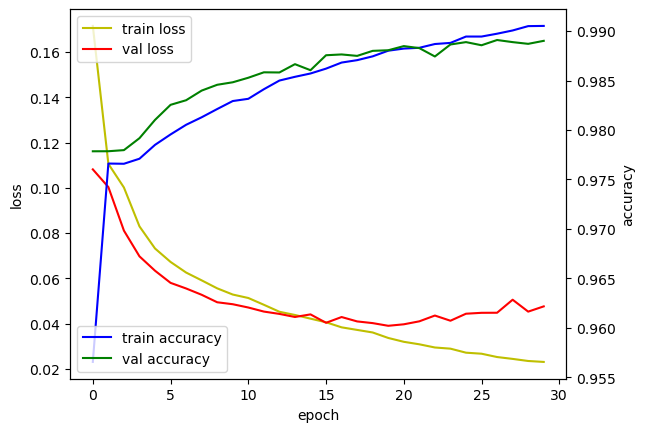

In [20]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']

loss_ax.plot(train_loss, 'y', label="train loss")
loss_ax.plot(val_loss, 'r', label="val loss")
acc_ax.plot(train_acc, 'b', label='train accuracy')
acc_ax.plot(val_acc, 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [13]:
import matplotlib.pyplot as plt

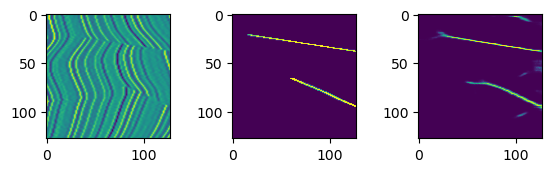

In [16]:
plt.subplot(1,3,1)
plt.imshow(X_test[10])
plt.subplot(1,3,2)
plt.subplots_adjust(wspace=0.5)
plt.imshow(Y_test[10])
plt.subplot(1,3,3)
plt.subplots_adjust(wspace=0.5)
plt.imshow(preds_test[10])
plt.show()

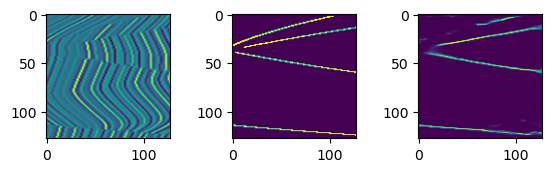

In [17]:
plt.subplot(1,3,1)
plt.imshow(X_test[30])
plt.subplot(1,3,2)
plt.subplots_adjust(wspace=0.5)
plt.imshow(Y_test[30])
plt.subplot(1,3,3)
plt.subplots_adjust(wspace=0.5)
plt.imshow(preds_test[30])
plt.show()

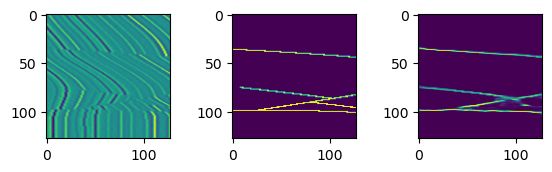

In [18]:
plt.subplot(1,3,1)
plt.imshow(X_test[50])
plt.subplot(1,3,2)
plt.subplots_adjust(wspace=0.5)
plt.imshow(Y_test[50])
plt.subplot(1,3,3)
plt.subplots_adjust(wspace=0.5)
plt.imshow(preds_test[50])
plt.show()